## GRAPPA Student Seminar 2019
# Week 2 - Script
### by *The Sterile Neutrinos* group

### Part 0. Pen and Paper (bonus)

*Feel free to skip to the next section.*

We wish to find the $J$-factor, defined as
$$\frac{\text{d}J}{\text{d}\Omega} \equiv \int \rho^2 \text{d}L,$$
where the integral is taken along the line of sight from an observer in the direction of $\text{d}\Omega$, and $\rho$ is the density of dark matter. In particular, we will be calculating this from the vantage point of an observer on Earth, i.e. located a distance $R_0$ away from the centre of the Milky Way, whose dark matter density we will assume to be given by the NFW profile:
$$\frac{\rho(r)}{\rho_s} = \frac{1}{r(1+r)^2},$$
where $\rho_s$ is a normalisation constant, and $r$ is the distance from the centre of the halo in units of a scale radius $r_s$. In these units the observer is located at $r_0 = R_0 / r_s$, and so, for points along a line of sight an angle $\psi$ away from the direction towards the Galactic centre, the cosine rule gives
$$r^2 = l^2 + r_0^2 - 2 r_0 l \cos{\psi} \quad\implies\quad \text{d}l = \frac{r}{l-r_0\cos{\psi}} \text{d}r = \pm \frac{r}{\sqrt{r^2 - r_0^2\sin^2{\psi}}} \text{d}r.$$
(In the last line we use Pythagoras's theorem and a bit of algebraic manipulation, otherwise known as staring at a drawing.) Here $l\equiv L/r_s$ is the distance along the line of sight, whose differential we substitute in the definition of $J$:
$$\frac{1}{\rho_s^2 r_s} \frac{\text{d}J}{\text{d}\Omega} \equiv \frac{\text{d}j}{\text{d}\Omega} = \pm \int \frac{\text{d}r}{r(1+r)^4\sqrt{r^2-r_0^2\sin^2\psi}}.$$

Now for the limits: the line of sight variable $l$ ranges from $0$ to $+\infty$, while the behaviour of $r$ depends on the value of $\psi$. For "Galactic longitudes" smaller than $\pi/2$ it initially decreases from $r_0$ to $r_0\sin\psi$, in which interval the integrand has a negative sign, and then increases from $r_0\sin\psi$ to $\infty$. Thus, we can write the integral as
\begin{align}
    \left.\frac{\text{d}j}{\text{d}\Omega}\right|_{\psi<\pi/2}
    & = \left[-\int\limits_{r_0}^{r_0\sin\psi} + \int\limits_{r_0\sin\psi}^{\infty}\right] \frac{\text{d}r}{r(1+r)^4\sqrt{r^2-r_0^2\sin^2\psi}} = \left[\int\limits_{r_0\sin\psi}^{r_0} + \int\limits_{r_0\sin\psi}^{\infty}\right] \frac{\text{d}r}{r(1+r)^4\sqrt{r^2-r_0^2\sin^2\psi}}
    \\ & = I(r_0)+I(\infty)-2I(r_0\sin\psi)
\end{align}
with $I$ the indefinite integral. When $\psi > \pi/2$ the behaviour is simpler, and $r$ ranges from $r_0$ to $\infty$, so
$$\left.\frac{\text{d}j}{\text{d}\Omega}\right|_{\psi>\pi/2} = I(\infty) - I(r_0).$$
However, we will not be very interested in this case because the dark matter density (and hence, chance of interactions) is greatest towards the centre of the halo, so this is where we will be directing our efforts and observations.

Now we simply need to get hold of the indefinite integral. Using Mathematica, we can expand the integrand into "partial fractions" (even though it is not strictly a rational function), which we painstakingly transcribe into Python (just kidding, we use `FortranForm` in Mathematica and `cmd+C`, `cmd+V`). We will use `sympy` for symbolic manipulation. In fact, `sympy` already has an equivalent `apart` function, but it, sadly, cannot handle roots.

In [1]:
import sympy as sym

r = sym.Symbol('r', nonnegative=True)
r_0 = sym.Symbol('r_0', nonnegative=True)
psi = sym.Symbol("psi")

a = sym.Symbol('a', nonnegative=True)

igrand = (-(sym.sqrt(-a**2 + r**2)/(a**2*r)) + 
          -  sym.sqrt(-a**2 + r**2)/((-1 + a)*(1 + a)*(1 + r)**4) - 
          -  (3*sym.sqrt(-a**2 + r**2))/((-1 + a)**2*(1 + a)**2*(1 + r)**3) + 
          -  (a**2*sym.sqrt(-a**2 + r**2))/((-1 + a)**2*(1 + a)**2*(1 + r)**3) + 
          -  (6*sym.sqrt(-a**2 + r**2))/((-1 + a)**3*(1 + a)**3*(1 + r)**2) - 
          -  (3*a**2*sym.sqrt(-a**2 + r**2))/((-1 + a)**3*(1 + a)**3*(1 + r)**2) + 
          -  (a**4*sym.sqrt(-a**2 + r**2))/((-1 + a)**3*(1 + a)**3*(1 + r)**2) - 
          -  (10*sym.sqrt(-a**2 + r**2))/((-1 + a)**4*(1 + a)**4*(1 + r)) + 
          -  (5*a**2*sym.sqrt(-a**2 + r**2))/((-1 + a)**4*(1 + a)**4*(1 + r)) - 
          -  (4*a**4*sym.sqrt(-a**2 + r**2))/((-1 + a)**4*(1 + a)**4*(1 + r)) + 
          -  (a**6*sym.sqrt(-a**2 + r**2))/((-1 + a)**4*(1 + a)**4*(1 + r)) + 
          -  sym.sqrt(-a**2 + r**2)/(2.*a**2*(1 + a)**4*(-a + r)) + 
          -  sym.sqrt(-a**2 + r**2)/(2.*(-1 + a)**4*a**2*(a + r)))
igrand

-a**6*sqrt(-a**2 + r**2)/((a - 1)**4*(a + 1)**4*(r + 1)) - a**4*sqrt(-a**2 + r**2)/((a - 1)**3*(a + 1)**3*(r + 1)**2) + 4*a**4*sqrt(-a**2 + r**2)/((a - 1)**4*(a + 1)**4*(r + 1)) - a**2*sqrt(-a**2 + r**2)/((a - 1)**2*(a + 1)**2*(r + 1)**3) + 3*a**2*sqrt(-a**2 + r**2)/((a - 1)**3*(a + 1)**3*(r + 1)**2) - 5*a**2*sqrt(-a**2 + r**2)/((a - 1)**4*(a + 1)**4*(r + 1)) - sqrt(-a**2 + r**2)/((a - 1)*(a + 1)*(r + 1)**4) + 3*sqrt(-a**2 + r**2)/((a - 1)**2*(a + 1)**2*(r + 1)**3) - 6*sqrt(-a**2 + r**2)/((a - 1)**3*(a + 1)**3*(r + 1)**2) + 10*sqrt(-a**2 + r**2)/((a - 1)**4*(a + 1)**4*(r + 1)) - 0.5*sqrt(-a**2 + r**2)/(a**2*(a - 1)**4*(a + r)) - 0.5*sqrt(-a**2 + r**2)/(a**2*(-a + r)*(a + 1)**4) - sqrt(-a**2 + r**2)/(a**2*r)

Nice. Thankfully, we introduced $a\equiv r_0\sin\psi$ because life is short. We would have liked it very much if `sympy` could integrate these "simple" terms, but, again, it falls short, and we resort to Mathematica and copy-paste again:

In [2]:
igral = (-(sym.sqrt(-a**2 + r**2)
           * (36 + 60*r + 26*r**2 + a**4 * (11 + 15*r + 6*r**2) - a**2 * (32 + 45*r + 17*r**2))
           / (6 * (-1 + a**2)**3*(1 + r)**3))
         - ((sym.I * sym.log((2*sym.I*a - 2*sym.sqrt(-a**2 + r**2))/r))
            / a)
         + (sym.I
            * (-8 + 8*a**2 - 7*a**4 + 2*a**6)
            * sym.log((4 * (-1 + a**2)**(sym.Rational(5, 2))
                         * (-sym.I*a**2 - sym.I*r
                            + sym.sqrt(-1 + a**2) * sym.sqrt(-a**2 + r**2)))
                      / ((-8 + 8*a**2 - 7*a**4 + 2*a**6)*(1 + r)))
            / (2 * (-1 + a**2)**sym.Rational(7, 2))))
igral

-sqrt(-a**2 + r**2)*(a**4*(6*r**2 + 15*r + 11) - a**2*(17*r**2 + 45*r + 32) + 26*r**2 + 60*r + 36)/(6*(a**2 - 1)**3*(r + 1)**3) + I*(2*a**6 - 7*a**4 + 8*a**2 - 8)*log(4*(a**2 - 1)**(5/2)*(-I*a**2 - I*r + sqrt(-a**2 + r**2)*sqrt(a**2 - 1))/((r + 1)*(2*a**6 - 7*a**4 + 8*a**2 - 8)))/(2*(a**2 - 1)**(7/2)) - I*log((2*I*a - 2*sqrt(-a**2 + r**2))/r)/a

Even nicer. Now we have imaginary logarithms, so no wonder `sympy` found it too hard. It probably doesn't know about principal branches and such. We'll pretend we don't as well and simply go on...

Let us now obtain the final expression for $\psi < \pi/2$ according to the above formula. However, let us not complicate things with infinities and instead consider a large upper bound $b$ on the integration, which we will let tend to infinity in the end. This is, in fact, the formal way to proceed with infinite integration:

In [3]:
b = sym.Symbol('b', nonnegative=True)
pigrand = (igral.subs(r, r_0) + igral.subs(r, b) - 2*igral.subs(r, a)).subs(a, r_0*sym.sin(psi))
pigrand

I*(2*r_0**6*sin(psi)**6 - 7*r_0**4*sin(psi)**4 + 8*r_0**2*sin(psi)**2 - 8)*log(4*(r_0**2*sin(psi)**2 - 1)**(5/2)*(-I*b - I*r_0**2*sin(psi)**2 + sqrt(b**2 - r_0**2*sin(psi)**2)*sqrt(r_0**2*sin(psi)**2 - 1))/((b + 1)*(2*r_0**6*sin(psi)**6 - 7*r_0**4*sin(psi)**4 + 8*r_0**2*sin(psi)**2 - 8)))/(2*(r_0**2*sin(psi)**2 - 1)**(7/2)) + I*(2*r_0**6*sin(psi)**6 - 7*r_0**4*sin(psi)**4 + 8*r_0**2*sin(psi)**2 - 8)*log(4*(r_0**2*sin(psi)**2 - 1)**(5/2)*(-I*r_0**2*sin(psi)**2 - I*r_0 + sqrt(-r_0**2*sin(psi)**2 + r_0**2)*sqrt(r_0**2*sin(psi)**2 - 1))/((r_0 + 1)*(2*r_0**6*sin(psi)**6 - 7*r_0**4*sin(psi)**4 + 8*r_0**2*sin(psi)**2 - 8)))/(2*(r_0**2*sin(psi)**2 - 1)**(7/2)) - I*(2*r_0**6*sin(psi)**6 - 7*r_0**4*sin(psi)**4 + 8*r_0**2*sin(psi)**2 - 8)*log(4*(r_0**2*sin(psi)**2 - 1)**(5/2)*(-I*r_0**2*sin(psi)**2 - I*r_0*sin(psi))/((r_0*sin(psi) + 1)*(2*r_0**6*sin(psi)**6 - 7*r_0**4*sin(psi)**4 + 8*r_0**2*sin(psi)**2 - 8)))/(r_0**2*sin(psi)**2 - 1)**(7/2) - sqrt(-r_0**2*sin(psi)**2 + r_0**2)*(r_0**4*(6*r_0**2 +

This is getting slighty out of hand, but we (computers) can handle it. In fact, we (computers) can probably simplify it, but life is too short for side quests, as we mentioned.

Okay, good, that's a result, so we could move on now... if it weren't the case that

In [4]:
pigrand.limit(psi, 0)

oo*sign(1/r_0)

$\text{d}J/\text{d}\Omega$ diverges when the line of sight passes through the Galactic centre. It was about time we opened our eyes to the divergence of the density that we've been ignoring all this time. Normally, we would deal with it by integrating over some volume, and so we wouldn't mind a singularity as long as the divergence were slower than $1/r^3$, i.e. we would simply want the mass to be finite.

*Fun fact: the NFW profile still manages to sneak in an infinite amount of matter by "not dying" quickly enough at infinity: there you need to be* quicker *than $1/r^3$, which N,F,&W merely reach, and hence their haloes have a logarithmically infinte mass.*

Back to interacting dark matter: the useful quantity for a central line of sight is in fact $\text{d}J$ itself instead of it's celestial density. The area element is, as usual $\text{d}\Omega = \sin\psi \text{d}\psi \text{d}\phi$, in polar coordinates with the direction towards the Galactic centre as the pole. Then the lattitude $\psi$ becomes a polar angle, and $\phi$ acts as an azimuthal coordinate circling the Galactic centre. Because of the axial symmetry (the spherical symmetry of the halo is broken by propping an observer in a certain "special" direction), none of the quantities depend on the "azimuth", so it can be integrted directly, if we are (and we are, indeed) considering a circular region around the Galactic centre:
$$\text{d}j = \left[2\pi \sin\psi \int\limits_{l=0}^{l=b} \frac{\text{d}r}{r(1+r)^4\sqrt{r^2-r_0^2\sin^2\psi}}\right] \text{d}\psi.$$

We pray that this is finite at the origin, or at least very slowly divergent, so that even the differential $\text{d}\psi$ can counter it. Let's see

In [5]:
(2*sym.pi * sym.sin(psi) * pigrand).limit(psi, 0)

2*pi**2/r_0

Well, that's a relief!! It's also quite remarkable: okay, the $2$ and one $\pi$ came from the $\phi$ integration, but the other $\pi$ appeared from the line integral (which has nothing to do with circles?). Notice also that this limit does not depend on $b$.

Now that we know that (the important) things won't blow up, we can move on. But before that, last bit of fun: let's plot the analytical solution for $\text{d}j/\text{d}\psi$:

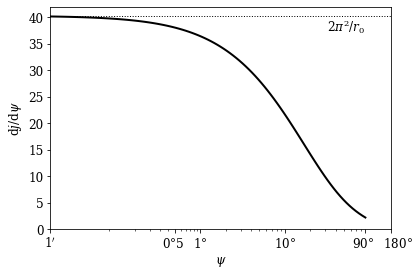

In [6]:
import numpy as np
%matplotlib inline
from matplotlib_import import *

def plot(x, y, hline=None, ax=None, fig=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    ax.semilogx(x, y, 'k-', **kwargs)
    
    ax.set_xlabel('$\psi$')
    ax.set_xlim(np.pi/(180*60), np.pi)
    ax.xaxis.set_ticks(np.deg2rad((180, 90, 10, 1, 0.5, 1/60)))
    ax.xaxis.set_ticklabels((r'    $180°$', r'$90°$  ', r'$10°$', r'$1°$', r'$0°5$  ', '$1\'$'))
    ax.xaxis.set_ticks(np.deg2rad(np.hstack((np.arange(5, 60, 5)/60,
                                             (np.arange(2, 10)[None, :]
                                              * np.array((1, 10))[:, None]).flat))),
                       minor=True)
    ax.xaxis.set_ticklabels([], minor=True)
    
    if hline is not None:
        ax.hlines(hline, *ax.get_xlim(), linestyles=':', linewidths=1)
    
    return fig, ax
    

PSI_ = np.logspace(np.log10(np.pi/(180*60)), np.log10(np.pi/2), 101)  # from 1'' to 90°

fig, ax = plot(PSI_, sym.lambdify((psi, r_0, b), (2*sym.pi * sym.sin(psi) * pigrand))(PSI_+0j, 0.49+0j, 1e6+0j),
               2*np.pi**2/0.49)
ax.text(np.pi/2, 40, '$2\pi^2/r_0$', fontsize=12,
       verticalalignment='top', horizontalalignment='right')
ax.set_ylim(0, 42)
ax.set_ylabel(r'$\mathrm{d}j / \mathrm{d}\psi$')
fig.tight_layout()

We used a *very big number*™ for $b$ instead of $\infty$ because the limit is not obvious, and `sympy` takes an insufferable amount of time to find it (or not, don't know, didn't have the patience to actually wait for the result). We know it exists, however, because we are simply integrating a quickly decaying $\rho^2 \propto 1/r^6$ without any additional volume factors. Mathematica found the limit in $\approx$ 10s.

The final task at hand would be to perform the $\psi$-integral. `sympy` has no chance with it, but even Mathematica gave up after putting in a significant amount of thought, so we (a computer) will need to go the old-fashioned way and crunch some numbers.

### Part 2. The Same, but Numerically

In our theoretical treatment we made a choice: less square roots in exchange for weird boundaries and cases depending on the value of $\psi$. From a numerical viewpoint, though, square roots are fine ([some finer than others](https://www.codeproject.com/Articles/69941/Best-Square-Root-Method-Algorithm-Function-Precisi)), while cases are annoying, so now we will take another approach: we will substitute for $r$ from the cosine rule into the expression for $\rho^2$ and integrate along $l$.

In [7]:
l = sym.Symbol("l", nonnegative=True)
r2 = r_0**2 + l**2 - 2*sym.cos(psi)*r_0*l
rho = (1 / (r * (1+r)**2)).subs(r, sym.sqrt(r2))
rho2_func = sym.lambdify((l, psi, r_0), rho**2, "numpy")

Because we asked in class, and because we know that *weird things*™ happen with the NFW density at infinity (so it is certainly physically inapplicable beyond the virialization radius, which region was probably not considered for the original fits anyway), we will extend the integral only up to $r=r_{\text{vir}}$. To determine the corresponding value for $l(r_{\text{vir}})$, we don't even need to remember a formula from eight grade!:

In [8]:
l_sol = sym.solve(sym.Eq(r2, r**2), l)
l_sol

[r_0*cos(psi) - sqrt(r**2 - r_0**2*sin(psi)**2),
 r_0*cos(psi) + sqrt(r**2 - r_0**2*sin(psi)**2)]

That's not $\LaTeX$-ed because there are two solutions (we should have at least remembered that!). To pick the "correct" one, we will need to assume that $r_0 < r_{\text{vir}}$, i.e. that the observer is inside the halo. Then the virial radius will be "higher" than the observer, and all the more so than $r_0\cos\psi$, so we need to select the solution with a positive sign.

In [9]:
l_solp = sym.lambdify((r, psi, r_0), l_sol[1])  # "positive vibes only"®

### Part 1. A Physical Aside

Dimensionless quantities can only take us so far. It's time we relate the scale density and radius to observable properties like the halo mass and the critical density of the universe (definitely *observable*). With units (and cosmological parameters), courtesy of `astropy`!

In [10]:
from astropy import units
from astropy import constants as C
from astropy.cosmology import Planck15 as cosmo

Because *everyone seems to be doing it*<sup>®</sup>, we will adopt a virialization radius such that the average halo density is $\Delta=200$ times the critical density.

In a recent study [Taylor et al. (2016)](https://arxiv.org/pdf/1510.06409.pdf) found that even the best estimates of the dark matter mass of the Milky Way can be up to $20\%$ uncertain. Furthermore, different stellar mass measurements, on which dark matter constraints are based, are often discrepant, leading to up to a factor of 2 difference in the DM mass. All in all, we have no better choice than to take the crude estimate
$$M_{200} \approx 10^{12}\ M_\odot.$$

The NFW concentration for the Milky Way shows less variation in different studies and can therefore be more safely assumed to be roughly
$$c = 12.6 \pm 1.8.$$

From these we can calculate the scale desnity and radius using the standard formulae from the slides (which are basically *the volume of a sphere*™ and *the definition of density*™).

The final ingredient for the calculation is the location of the observer in the halo. For $R_0$ we will take the distance to Sgt A* from [The GRAVITY Collaboration (2019)](https://arxiv.org/abs/1904.05721) (found on [Wikipedia](https://en.wikipedia.org/wiki/Sagittarius_A*) of course):
$$R_0 = 8178 \pm 26\ \text{pc},$$
which we'll put in as simply $8.2\ \text{kpc}$.

In [11]:
Delta = 200
M = 1e12 * units.M_sun  # https://arxiv.org/pdf/1510.06409
c = 12.6

R_0 = 8.2 * units.kpc  # https://arxiv.org/abs/1904.05721

r_200 = (M / ((4/3)*np.pi * Delta*cosmo.critical_density0))**(1/3)
r_s = r_200/c
rho_s = (Delta * c**3 / (np.log(1+c) - c/(1+c))) * cosmo.critical_density0

r_o = (R_0 / r_s).to('').value
J_0 = ((rho_s * C.c**2)**2 * r_s).to('GeV^2 / cm^5')

In [12]:
from IPython.display import display, Latex

kwargs = dict(format='latex', precision=2)
Latex((r'\begin{align}'
       + r'r_{{200}} &= {}'.format(r_200.to_string('kpc', **kwargs))
       + r'\\ r_s &= {}'.format(r_s.to_string('kpc', **kwargs))
       + r'\\ \rho_s &= {} = {}\rho_c'.format(rho_s.to_string('M_sun/kpc^3', **kwargs),
                                              (rho_s/cosmo.critical_density0).to_string('', **kwargs))
       + r'\\ r_0 &= {:.2f}'.format(r_o)
       + r'\\ \rho_s^2 r_s \equiv J_0 & = {} = {}'.format((J_0/C.c**4).to_string('M_sun^2 / kpc^5', **kwargs),
                                                          J_0.to_string(**kwargs))
       + r'\end{align}').replace('$', ''))

<IPython.core.display.Latex object>

Then we simply need to define a function to integrate $\rho^2$, represented by `rho2_func`, in the range appropriate for a given $\psi$, vectorize it, so that we can run it for an array of `psi`s at once:

In [13]:
from scipy.integrate import quad

@np.vectorize
def djdO(psi, r_0, c, **kwargs):
    return quad(rho2_func, 0, l_solp(c, psi, r_0), (psi, r_0), **kwargs)

and actually run it for an array of `psi`s spanning the range from $1\ \textrm{arcmin}$ (at $\psi=0$, as we discussed the integral diverges) to $\psi=180°$:

In [14]:
PSI = np.logspace(np.log10(np.pi/(180*60)), np.log10(np.pi), 1001)
y, yerr = djdO(PSI, r_o, c, epsabs=1e-12, epsrel=1e-12, limit=100)

so that we can finally make some plots!

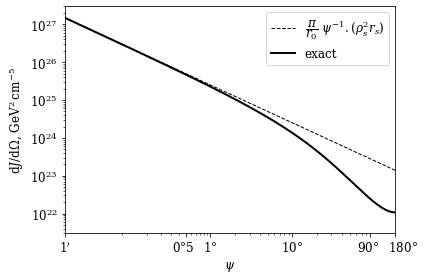

In [15]:
fig, ax = plt.subplots()
ax.plot(PSI, (np.pi/r_o/PSI) * J_0, 'k--', linewidth=1,
        label=r'$\dfrac{\pi}{r_0}\ \psi^{-1} . (\rho_s^2r_s)$')
plot(PSI, y*J_0, ax=ax, label='exact')

ax.set_yscale('log')
ax.set_ylim(3e21, 3e27)
# ax.set_xlim(PSI[0], PSI[-1])
ax.set_ylabel(r'$\mathrm{d}J / \mathrm{d}\Omega$, '+J_0.unit.to_string('latex_inline'))
ax.legend(loc='upper right', fontsize=12)
fig.tight_layout()

We see that the celestial density diverges as $1/\psi$ for small angles, which would mean that $\mathrm{d}j / \mathrm{d}\psi$ will remain finite at the pole (famously $\underset{x\rightarrow0}{\lim} \sin{x} / x = 1$). Let's check that:

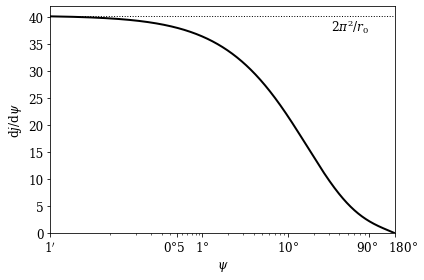

In [16]:
z = 2*np.pi * np.sin(PSI) * y
fig, ax = plot(PSI, z, 2*np.pi**2/r_o)
ax.text(np.pi/2, 40, '$2\pi^2/r_0$', fontsize=12,
       verticalalignment='top', horizontalalignment='right')
ax.set_ylim(0, 42)
ax.set_ylabel(r'$\mathrm{d}j / \mathrm{d}\psi$')
fig.tight_layout()

And voilà!, we have, unsurprisingly, reproduced the theoretical prediction.

### Part 3. Integration

And for our last trick, we are going to integrate the are under the curve in the previous plot from zero (where exactly is the zero on that plot anyway?) up to $0.5°$. For these small angles we can approximate the integrand as the constant $2\pi^2/r_0$ and give an estimate:

In [17]:
j0_est = 2*np.pi**2/r_o * np.deg2rad(0.5)
Latex('$J_{{\\text{{est}}}} = {}$'.format((j0_est*J_0).to_string(precision=4, format='latex').replace('$', '')))

<IPython.core.display.Latex object>

However, we see from the plot that by $\psi=0.5°$ there is a noticeable deviation, so we had better formally integrate:

In [18]:
psi0 = np.deg2rad(0.5)
%time j0_int, j0_int_err = quad(lambda psi: 2*np.pi*np.sin(psi) * djdO(psi, r_o, c)[0], 0, psi0)

# requires astropy 3.2.1!
Latex(r'$J_{\text{exact}} = '
      + r'{} \pm 10^{{{:.0f}}}\%\ \text{{(int.)}}'.format((j0_int*J_0).to_string(format='latex', precision=4),
              np.ceil(np.log10(100*j0_int_err/j0_int))).replace('$', '')
      + '$')

CPU times: user 11 s, sys: 107 ms, total: 11.1 s
Wall time: 11.6 s


<IPython.core.display.Latex object>

The integrator reports extremely good precision. Unfortunately, uncertainties in the the overall normalisation, stemming from $M_{200}$, and with regards to the actual shape of the dark matter profile prompt us to quote the result as
$$J \approx 2\times10^{22}\ \text{GeV}^2 / \text{cm}^5,$$
or even $\approx 10^{22}\ \text{GeV}^2 / \text{cm}^5$.

In the end the trivial linear approximation $J \approx \dfrac{\pi}{r_0}\ 2\pi \psi . \rho_s r_s$ is almost indistinguishably close to the full solution, and we could have almost guessed it without doing any integrals!

### Bonus: All the Angles!

To see how far the approximation can be extended, let's plot $J(\psi)$. Instead of waiting for a long time for the integration at each value of $\psi$, we will simply use the Riemann-`cumsum` representation of the integral using the values of $\text{d}j/\text{d}\psi$ we calculated above

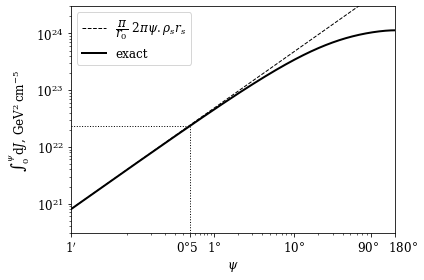

In [19]:
# integral as a sum:
zi = (PSI[0]*z[0] + np.hstack((0, np.cumsum((PSI[1:]-PSI[:-1]) * (z[1:] + z[:-1]) / 2))))

fig, ax = plt.subplots()
ax.plot(PSI, 2*np.pi**2/r_o * PSI * J_0, 'k--', linewidth=1,
        label=r'$\dfrac{\pi}{r_0}\ 2\pi \psi . \rho_s r_s$')
plot(PSI, zi*J_0, ax=ax, label='exact')

ax.set_yscale('log')
ax.set_ylim(3e20, 3e24)
ax.hlines(j0_int*J_0.value, plt.xlim()[0], psi0, linestyles=':', linewidths=1)
ax.vlines(psi0, 3e18, j0_int*J_0.value, linestyles=':', linewidths=1)
ax.set_ylabel(r'$\int_0^\psi \mathrm{d}J$, '+J_0.unit.to_string('latex_inline'))
ax.legend(loc='upper left', fontsize=12)
fig.tight_layout()

We see that the approximation is quite good even up to $\psi=10°$, and for the whole sky the difference is *just one order of magnitude*™. All that hard work for a mere speck in the grand (cosmological) scheme of things.